<a href="https://colab.research.google.com/github/yrsheld/Practice/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Practice on sklearn & tensorflow

A simple practice to do binary classification to predict whether the person has diabetes, based on body data (8 features).

In [115]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

### Data

In [116]:
df = pd.read_csv('diabetes.csv')

In [117]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [118]:
for col in df.columns:
  print(col)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


### Plot features

In [ ]:
for feature in df.columns[:-1]:
  plt.hist(df[df['Outcome']==1][feature], density=True, alpha=0.7, label = 'Yes', color='red')    #1: red
  plt.hist(df[df['Outcome']==0][feature], density=True, alpha=0.7, label='No', color='blue')   #0: blue
  plt.xlabel(feature)
  plt.ylabel('Probability')
  plt.grid(True)
  plt.legend()
  plt.show()

### Train, validation, test dataset

In [122]:
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)           # 60% train
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0) # 20% valid, 20% test

### Standarizing data

In [128]:
def scaler_dataset(X_, y, oversample=False):
  scaler = StandardScaler()
  X_ = scaler.fit_transform(X_)

  if oversample:
    ros = RandomOverSampler()
    X_, y = ros.fit_resample(X_, y)

  data = np.hstack((X_, y.reshape(-1,1)))

  return data, X_, y

In [129]:
train, X_train, y_train = scaler_dataset(X_train, y_train, True)
valid, X_valid, y_valid = scaler_dataset(X_valid, y_valid, False)
test, X_test, y_test = scaler_dataset(X_test, y_test, False)

In [130]:
print(len(y_train), y_train.sum())    # now the number of data from both classes are balanced

590 295


### Logistic Regression

In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [132]:
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)

LogisticRegression()

In [133]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.77      0.83       105
           1       0.62      0.82      0.71        49

    accuracy                           0.79       154
   macro avg       0.76      0.79      0.77       154
weighted avg       0.81      0.79      0.79       154



### SVM

In [134]:
from sklearn.svm import SVC

In [135]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [136]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84       105
           1       0.65      0.82      0.72        49

    accuracy                           0.80       154
   macro avg       0.77      0.80      0.78       154
weighted avg       0.82      0.80      0.80       154



### Neural Net

In [137]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.legend()
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.legend()
  ax2.grid(True)

In [138]:
X_train.shape    # 8 features

(590, 8)

In [164]:
dropout_prob = 0.2

nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(8,)),   # input layer
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(32, activation='relu'),         # hidden layer
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(1, activation='sigmoid')        # output layer
])

In [165]:
lr = 0.001
loss = 'binary_crossentropy'
nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [166]:
epochs = 100
batch_size = 32

history = nn_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_valid, y_valid), verbose=0)

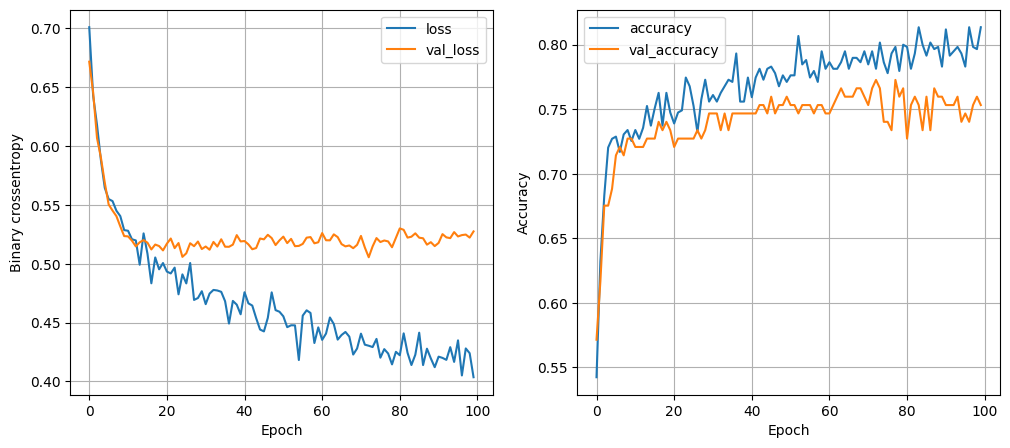

In [167]:
plot_history(history)

#### Prediction

In [160]:
y_pred = nn_model.predict(X_test)   # sigmoid output
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

5/5 [==============================] - 0s 3ms/step


In [161]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83       105
           1       0.63      0.80      0.70        49

    accuracy                           0.79       154
   macro avg       0.76      0.79      0.77       154
weighted avg       0.81      0.79      0.79       154



In [170]:
result = nn_model.evaluate(X_test, y_test)   # loss, accuracy

5/5 [==============================] - 0s 6ms/step - loss: 0.5000 - accuracy: 0.7857


In [171]:
print(result)

[0.49997732043266296, 0.7857142686843872]
